# Student Risk Segmentation using K-Means Clustering

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv('students_scored.csv')
df.head()


,student_id,age,program,semester,gpa,attendance,assignments_completion,stress_level,sleep_hours,mental_wellbeing,...,distractions,career_clarity,skill_readiness,engagement_score,APS,WWS,PTMS,CRS,SRI,Category
0,S001,19,MBA,2,5.60,94,65,8,8,4,...,2,5,3,57,71.666667,26.666667,21.666667,45.666667,41.416667,Red
1,S002,22,MBA,7,6.43,74,88,3,8,8,...,8,2,9,78,75.433333,48.333333,36.000000,62.666667,55.608333,Yellow
2,S003,19,MBA,6,8.29,66,65,3,7,6,...,4,6,9,61,71.300000,38.333333,35.000000,70.333333,53.741667,Yellow
3,S004,22,B.Tech,7,6.56,65,95,5,6,6,...,6,9,4,42,75.200000,31.666667,45.000000,57.333333,52.300000,Yellow
4,S005,18,MBA,2,5.68,84,77,8,7,3,...,3,6,5,54,72.600000,20.000000,24.000000,54.666667,42.816667,Red


## Data Preprocessing & Normalization

In [2]:

numeric_df = df.select_dtypes(include=[np.number])

numeric_df = numeric_df.fillna(numeric_df.mean())

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

scaled_data[:5]


array([[-1.24999715, -1.32394521, -1.50845762,  1.56266536, -1.31865039,
         1.04868996,  1.04580574, -0.3141485 , -1.35740913, -1.24612074,
        -0.15676802, -1.52511408, -0.62991546, -0.89611957, -0.04559608,
        -1.25668432, -1.54332552, -1.39104112],
       [ 0.3525633 ,  1.14610183, -0.76849318, -0.33147447,  0.51946834,
        -1.44819089,  1.04580574,  1.64927965,  0.92012297,  1.7208334 ,
        -1.39441032,  1.35245965,  0.66190336, -0.29764728,  1.93023385,
         0.34680013,  0.17372512,  1.02723474],
       [-1.24999715,  0.65209242,  0.88974037, -1.08913041, -1.31865039,
        -1.44819089,  0.3667111 ,  0.66756557,  0.92012297, -0.25713603,
         0.25577941,  1.35245965, -0.38385474, -0.95437794,  1.01831235,
         0.23492912,  0.9480813 ,  0.70915265],
       [ 0.3525633 ,  1.14610183, -0.65259514, -1.1838374 ,  1.07889578,
        -0.44943855, -0.31238353,  0.66756557,  1.37562939,  0.73184869,
         1.49342171, -1.04551846, -1.55264319, -0.334

## Apply K-Means Clustering

In [3]:

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

df['Cluster'] = clusters
df.head()


,student_id,age,program,semester,gpa,attendance,assignments_completion,stress_level,sleep_hours,mental_wellbeing,...,career_clarity,skill_readiness,engagement_score,APS,WWS,PTMS,CRS,SRI,Category,Cluster
0,S001,19,MBA,2,5.60,94,65,8,8,4,...,5,3,57,71.666667,26.666667,21.666667,45.666667,41.416667,Red,0
1,S002,22,MBA,7,6.43,74,88,3,8,8,...,2,9,78,75.433333,48.333333,36.000000,62.666667,55.608333,Yellow,1
2,S003,19,MBA,6,8.29,66,65,3,7,6,...,6,9,61,71.300000,38.333333,35.000000,70.333333,53.741667,Yellow,2
3,S004,22,B.Tech,7,6.56,65,95,5,6,6,...,9,4,42,75.200000,31.666667,45.000000,57.333333,52.300000,Yellow,2
4,S005,18,MBA,2,5.68,84,77,8,7,3,...,6,5,54,72.600000,20.000000,24.000000,54.666667,42.816667,Red,0


## Cluster Visualization using PCA

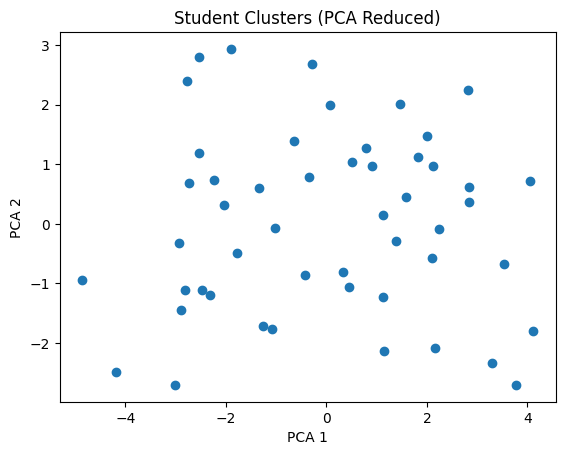

In [4]:

pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_data)

plt.figure()
plt.scatter(reduced[:,0], reduced[:,1])
plt.title("Student Clusters (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


## Cluster Analysis

In [11]:
at_risk_cluster = df.groupby('Cluster')['SRI'].mean().idxmax()

# Remaining cluster → Career-Confused
all_clusters = set(df['Cluster'].unique())
career_confused_cluster = list(all_clusters - {at_risk_cluster})[0]

print("At-Risk Cluster:", at_risk_cluster)
print("Career-Confused Cluster:", career_confused_cluster)


At-Risk Cluster: 1
Career-Confused Cluster: 0


In [13]:
def label_cluster(cluster_id):
    if cluster_id == at_risk_cluster:
        return "At-Risk"
    elif cluster_id == career_confused_cluster:
        return "Career-Confused"
    else:
        return "High performance"

df['Cluster_Label'] = df['Cluster'].apply(label_cluster)

df[['Cluster', 'Cluster_Label']].head()


,Cluster,Cluster_Label
0,0,Career-Confused
1,1,At-Risk
2,2,High performance
3,2,High performance
4,0,Career-Confused


## Comparing ML based Insights vs Rule Based

In [14]:
# Rule-based classification
def rule_based_sri(sri):
    if sri >= 7:
        return "At-Risk"
    elif sri <= 3:
        return "High Performer"
    else:
        return "Career-Confused"

df['Rule_Based_Label'] = df['SRI'].apply(rule_based_sri)

In [15]:
comparison = pd.crosstab(df['Cluster_Label'], df['Rule_Based_Label'])

print("Comparison Table:")
print(comparison)

Comparison Table:
Rule_Based_Label  At-Risk
Cluster_Label            
At-Risk                19
Career-Confused        17
High performance       14


In [16]:
agreement = (df['Cluster_Label'] == df['Rule_Based_Label']).mean() * 100

print(f"Agreement between ML and Rule-Based: {agreement:.2f}%")

Agreement between ML and Rule-Based: 38.00%
